[参考链接](https://blog.csdn.net/weixin_43628432/article/details/105879254)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
# 初始化画布
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

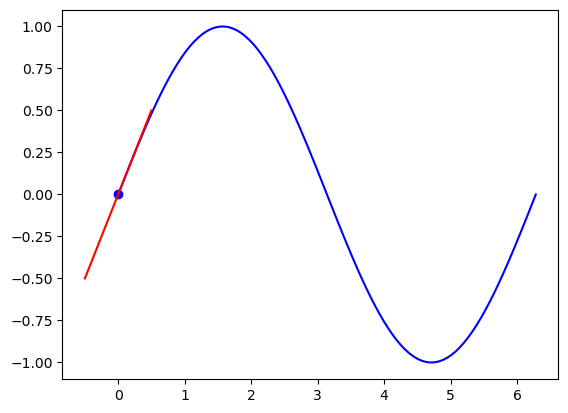

In [25]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

# 绘制x,y坐标, (5, 0.8)是text的坐标
xtext = plt.text(5, 0.8, '', fontsize=12)
ytext = plt.text(5, 0.7, '', fontsize=12)
ktext = plt.text(5, 0.6, '', fontsize=12)

# 绘制曲线
curve_ani = plt.plot(x, y, color='blue')[0]
# 绘制切点
point_ani = plt.plot(0, 0, color='blue', marker='o')
# 绘制切线
k0 = slop(x[0])
xs, ys = tangent_line(x[0], y[0], k0)
tangent_ani = plt.plot(xs, ys, color='r')[0]

ani = animation.FuncAnimation(fig=fig,func=update,frames=np.arange(0,100),interval=100)
# ani.save('sin_x.gif')
plt.show()

In [17]:
# 计算x0处斜率的函数
def slop(x0):
    x_min = np.sin(x0 - 0.05)
    x_max = np.sin(x0 + 0.05)
    t = (x_max - x_min) / 0.1
    return t

In [18]:
# 计算x0处切线的函数
def tangent_line(x0, y0, t):
    xs = np.linspace(x0 - 0.5, x0 + 0.5, 100)
    ys = t * (xs - x0) + y0
    return xs, ys

In [23]:
# 更新数据的函数
def update(num):
    k=slop(x[num])
    xs,ys=tangent_line(x[num],y[num],k)
    point_ani.set_data(x[num],y[num])
    tangent_ani.set_data(xs,ys)
    xtext.set_text('x=%.3f'%x[num])
    ytext.set_text('y=%.3f'%y[num])
    ktext.set_text('k=%.3f'%k)
    return [point_ani,xtext,ytext,ktext,tangent_ani,k]